## Diversos

#### Formas de declaração de dicionários

Existem múltiplas formas de declarar dicionários. Já tínhamos visto a sintaxe com o uso de `{}`:

In [1]:
{'primeiro': 23, 'segundo': 45}

{'primeiro': 23, 'segundo': 45}

Também é possível usar a função construtora `dict()`, que coleta todos os parâmetros passados por `chave=valor` em um dicionário (veja os detalhes sobre coleta de valores em funções na aula passada):

In [2]:
dict(primeiro=23, segundo=45)

{'primeiro': 23, 'segundo': 45}

Uma terceira opção é usar um `zip`. Essa função é útil quando as chaves e os valores são construídos pelo seu programa separadamente:

In [3]:
chaves=['primeiro', 'segundo']
valores=[23, 45]
dict(zip(chaves, valores))

{'primeiro': 23, 'segundo': 45}

#### Expressões condicionais

Geramente, quando um comando condicional espera uma expressão, essa expressão deve retornar um booleano:

In [4]:
a = 4
if a < 5:
    print('menor')

menor


In [5]:
a < 5

True

In [6]:
a > 5

False

Mas, como em C, condicionais também funcionam com não booleanos.

Por exemplo, para inteiros, 0 é considerado falso, qualquer valor diferente de zero é considerado verdadeiro.

In [7]:
a = 0
if a:
    print('verdadeiro')
else:
    print('falso')

falso


In [8]:
a = 10
if a:
    print('verdadeiro')
else:
    print('false')

verdadeiro


`None` é considerado falso:

In [9]:
a = None
if a:
    print('verdadeiro')
else:
    print('falso')

falso


Listas, dicionários, conjuntos ou cadeias vazias são também considerados falsos. Se tiverem algum elemento, são considerados verdadeiros.

In [10]:
a = []
if a:
    print('verdadeiro')
else:
    print('falso')

falso


In [11]:
a = {}
if a:
    print('verdadeiro')
else:
    print('falso')

falso


In [12]:
a = set()
if a:
    print('verdadeiro')
else:
    print('falso')

falso


In [13]:
a = ''
if a:
    print('verdadeiro')
else:
    print('falso')

falso


In [14]:
a = [0]
if a:
    print('verdadeiro')
else:
    print('falso')

verdadeiro


In [15]:
a = '0'
if a:
    print('verdadeiro')
else:
    print('falso')

verdadeiro


#### Iteração em dicionários

Quando iteragimos pelos elementos de um dicionário (por exemplo, em um `for`), a iteração ocorre pelas chaves, na ordem que o Python considerar conveniente.

In [16]:
d = dict(zip(['a','b','c','d'], [1,2,3,4]))

In [17]:
d

{'a': 1, 'b': 2, 'c': 3, 'd': 4}

In [18]:
for x in d:
    print(x)

b
a
d
c


Para acessar o valor, indexamos o dicionário.

In [19]:
for x in d:
    print(x, d[x])

b 2
a 1
d 4
c 3


Outra opção é usar o método `items` de dicionários, que retorna tuplas chave/valor:

In [20]:
for x in d.items():
    print(x)

('b', 2)
('a', 1)
('d', 4)
('c', 3)


Ele é normalmente usado em conjunto com desempacotamento, para já acessar a chave e o correspondente valor em variáveis distintas.

In [21]:
for chave, valor in d.items():
    print(chave, valor)

b 2
a 1
d 4
c 3


Se quisermos que as chaves sejam percorridas em uma ordem específica, devemos requisitar:

In [22]:
for x in sorted(d):
    print(x, d[x])

a 1
b 2
c 3
d 4


In [23]:
for x in sorted(d, reverse=True):
    print(x, d[x])

d 4
c 3
b 2
a 1


Ou então:

In [24]:
for chave, valor in sorted(d.items(), reverse=True):
    print(chave, valor)

d 4
c 3
b 2
a 1


#### Compreensões versus map ou filter

Em diversas situações, o uso de `map` ou `filter` é equivalente ao uso de *list comprehension*, sendo a escolha feita de acordo com conveniência no código, ou por questões de eficiência (no caso de haver muitos elementos).

Veja os exemplos abaixo.

In [25]:
list(map(lambda i: i * i, range(10)))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [26]:
l1 = []
for i in range(10):
    l1.append(i * i)

In [27]:
l1

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [28]:
[i * i for i in range(10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [29]:
%timeit list(map(lambda i: i * i, range(10)))

The slowest run took 6.10 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 5.14 µs per loop


In [30]:
%timeit [i * i for i in range(10)]

The slowest run took 28.25 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.72 µs per loop


In [31]:
def teste():
    l1 = []
    for i in range(10):
        l1.append(i * i)

%timeit teste()

The slowest run took 5.93 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.62 µs per loop


In [32]:
list(filter(lambda i: i % 3 == 0, range(30)))

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27]

In [33]:
[x for x in range(30) if x % 3 == 0]

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27]

In [34]:
%timeit list(filter(lambda i: i % 3 == 0, range(30)))

10000 loops, best of 3: 14.7 µs per loop


In [35]:
%timeit [x for x in range(30) if x % 3 == 0]

The slowest run took 4.19 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 7.35 µs per loop


## Exemplo: Raizes de funções

Frequentemente desejamos encontra os zeros de uma dada função. Veremos duas formas de realizar isso numericamente.

### Método da bissecção



Uma forma de fazer isso é o chamado *método de bissecção*. Se temos dois pontos `a` e `b` onde a função tem sinais contrários então (supondo que a função é contínua) ela deve ter uma raiz entre esses dois valores.

Dividimos então, iterativamente, o intervalo em 2 e verificamos em qual das metades continua existindo uma troca de sinal no valor da função. Mantemos então esse novo intervalo.

Na função abaixo, `f` é a função da qual queremos a raiz, `a` e `b` são dois pontos para os quais `f(a)` e `f(b)` devem ter sinais opostos, `precisao` é o erro máximo aceitável no valor da raiz calculado.

In [2]:
def bisseccao(f, a, b, precisao):
    fa = f(a)
    fb = f(b)
    if fa * fb >= 0: # Se têm mesmo sinal, é um erro
        raise Exception('Intervalo inválido')
    x = (a + b) / 2 # Calcula o ponto médio e sua função
    fx = f(x)
    # Repetitivamente, terminando quando acha raiz ou intervalo é pequeno
    while fx != 0.0 and abs(b - a) >= precisao:
        # Substitui o limite com mesmo sinal que f(x) por x
        if fx * fa > 0:
            a = x
            fa = fx
        else:
            b = x
        # Recalcula ponto médio
        x = (a + b) / 2
        fx = f(x)
    return x

In [3]:
import math

Vamos primeiro plotar a função para termos uma idéia de onde temos uma raiz.

Usaremos a função $\cos x - 1/2$ e estamos interessados no intervalo $[0,3]$.

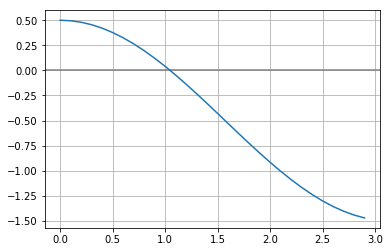

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 3, 0.1)
y = np.cos(x) - 0.5
plt.axhline(0, color='gray')
plt.grid(True)
plt.plot(x, y);

Vemos que nesse intervalo existe uma raiz um pouco acima de 1. Usamos agora o método da bissecção para encontrar essa raiz. Criamos uma função lambda para a expressão da função $f(x) = \cos x - 1/2$.

In [5]:
raiz = bisseccao(lambda x: math.cos(x) - 0.5, 0, 3, 1e-8)
print(raiz)

1.0471975514665246


O valor da função nesse ponto deve ser próximo de zero.

In [6]:
math.cos(raiz) - 0.5

-2.337635085503109e-10

### Método da secante

Um outro método, frequentemente mais eficiente, consiste em, ao invés de dividir o intervalo em duas partes iguais, fazer uma divisão baseada numa aproximação linear entre os dois pontos do intervalo atual. Isto é, ao invés de $x=(a+b)/2$ usamos $$x=\frac{a f(b) - b f(a)}{f(b) - f(a)}$$

In [7]:
def secante(f, a, b, precisao):
    fa = f(a)
    fb = f(b)
    if fa * fb >= 0:
        raise Exception('Invalid interval')
    x = (a * fb - b * fa) / (fb - fa)
    fx = f(x)
    while fx != 0.0 and abs(b - a) >= precisao:
        if fx * fa > 0:
            a = x
            fa = fx
        else:
            b = x
            fb = fx
        x = (a * fb - b * fa) / (fb - fa)
        fx = f(x)
    return x

In [8]:
raiz = secante(lambda x: math.cos(x) - 0.5, 0, 3, 1e-8)
print(raiz)

1.0471975511965976


In [9]:
math.cos(raiz) - 0.5

1.1102230246251565e-16

### Comparando os tempos

In [10]:
%timeit bisseccao(lambda x: math.cos(x)-0.5, 0, 3, 1e-8)

10000 loops, best of 3: 23.5 µs per loop


In [11]:
%timeit secante(lambda x: math.cos(x)-0.5, 0, 3, 1e-8)

100000 loops, best of 3: 8.74 µs per loop


## Exemplo: Integração numérica

Outra operação útil é a integração numérica: Queremos calcular uma aproximação para a integral definida de uma função num intervalo especificado. Existem diversas formas de realizá-la. Uma forma simple é a chamada *regra do trapézio*, onde avaliamos o valor da função para um número de pontos igualmente espaçados no intervalo e em cada subintervalo aproximamos a área sob a função pelo trapézio formado pelos pontos $(x_i, 0), (x_i, f(x_i)), (x_{i+1}, f(x_{i+1})), (x_{i+1}, 0)$.

Se $a$ e $b$ são os limites do intervalo de interesse, dividimos esse intervalo em $N$ subintervalos, cada um de tamanho $h=(b-a)/N$. Então avaliamos a função nos pontos $f(x_0=a), f(x_1=a+h), f(x_2=a+2h), \ldots f(x_{N-1}=a+(N-1)h), f(b=a+Nh)$.

A integral será então aproximada por:
$$
\left[\frac{1}{2}f(a) + f(a+h) + f(a+2h) + \cdots + f(a+(N-1)h) + \frac{1}{2}f(b)\right]h
$$

In [1]:
def trapezio(f, a, b, N):
    h = (b - a) / N
    s = (f(a) + f(b)) / 2
    for i in range(1, N):
        s += f(a + i * h)
    return s * h

Agora usaremos o método do trapézio para calcular uma aproximação para
$$ \int_0^{\pi / 2} \sin x\, dx.$$

In [6]:
import math
trapezio(math.sin, 0, math.pi/2, 1000000)

0.9999999999997817

A desvantagem desse método é que não sabemos de antemão o número de intervalos para atingirmos uma resposta com precisão apropriada. (Experimente diversos valores de $N$ na chamada acima.)

Podemos resolver esse problema aumentando o número de intervalos até atingir a precisão que queremos. A idéia é considerar que, após a integral estar suficientemente próxima da resposta, se duas iterações sucessivas com números crescentes de intervalos não fornecerem diferenças significativas no valor da integral calculada, então podemos considerar que já houve convergência.

No codigo abaixo, começamos com 1 intervalo, e a cada vez vamos dobrando o número de intervalos (e correspondentemente dividindo $h$ por 2). Desta forma, a cada iteração precisamos apenas calcular os valores da função nos novos pontos, e podemos aproveitar os cálculos feitos para os pontos anteriores, lembrando de reescalar o resultado anterior para o novo (menor) valor de $h$.

In [14]:
def trapezio_precisao(f, a, b, epsilon):
    # curriter: iteração atual. Começa com 0
    # N: número de intervalos na iteração atual, começa com 1
    # h: tamanho do intervalo na iteração atual, começa com b - a
    curriter, N, h = 0, 1, (b - a)
    # Guarda os valores das pontas em s
    s = (f(a) + f(b)) * h / 2
    # olds vai guardar s da iteração anterior
    # Começa com valor suficientemente diferente de s
    olds = s + 10*epsilon
    # Repete a iteração pelo menos 4 vezes e até chegar na precisão
    while abs(s - olds) >= epsilon or curriter < 4:
        # Ajusta para próxima iteração
        curriter, N, h = curriter + 1, N * 2, h / 2
        # Se teve muitas iterações e não convergiu, há problema.
        if curriter > 25:
            raise Exception("Falta de convergência em trapezio_precisao")
        olds = s # Guarda aproximação anterior
        # Soma novos pontos em s
        s = 0
        # Os i ímpares são os novos pontos. Pares já incluídos em olds
        for i in range(1, N, 2):
            s += f(a + i * h)
        # Junta contribuição dos novos pontos com anterior reescalado
        # para novo valor de h
        s = s * h + olds / 2
    return s

Testando agora com a mesma integral anterior:

In [15]:
trapezio_precisao(math.sin, 0, math.pi/2, 1e-8)

0.9999999969360728

## Enquanto isso, no mundo real

Como eu já comentei, implementar suas próprias rotinas numéricas (a não ser para estudo) é arriscado e inútil: melhor usar rotinas implementadas por especialistas. No caso do Python, as rotinas para achar raízes e para integração numérica estão disponíveis no pacote SciPy.

As funções para raízes estão no módulo de otimização:

In [7]:
import scipy.optimize

O método da bissecção está implementado em `scipy.optimize.bisect`, que tem parâmetros similares à desenvolvida acima, mas a precisão é especificada pelo parâmetro chave/valor `xtol` (existe opcionalmente o parâmetro `rtol` para especificar precisão relativa).

In [8]:
scipy.optimize.bisect(lambda x: math.cos(x) - 0.5, 0, 3, xtol=1e-8)

1.0471975486725569

O método da secante é chamado pela função `scipy.optimize.newton` se não for fornecida a derivada da função (se fornecemos a derivada, o chamado método de Newton é usado). Ao invés de aceitar um intervalor para a raiz, esta função aceita um "chute" inicial do valor.

In [17]:
scipy.optimize.newton(lambda x: math.cos(x) - 0.5, 1.5, tol=1e-8)

1.0471975511966207

Chegou a hora de comparar os tempos:

In [18]:
%timeit bisseccao(lambda x: math.cos(x)-0.5, 0, 3, 1e-8)

10000 loops, best of 3: 21.3 µs per loop


In [19]:
%timeit scipy.optimize.bisect(lambda x: math.cos(x) - 0.5, 0, 3, xtol=1e-8)

The slowest run took 4.88 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 15 µs per loop


In [20]:
%timeit secante(lambda x: math.cos(x)-0.5, 0, 3, 1e-8)

The slowest run took 5.08 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 8.45 µs per loop


In [21]:
%timeit scipy.optimize.newton(lambda x: math.cos(x) - 0.5, 1.5, tol=1e-8)

100000 loops, best of 3: 5.8 µs per loop


Para integração, uma função de fácil uso é a função `quad` do módulo `scipy.integrate`:

In [22]:
import scipy.integrate

In [23]:
scipy.integrate.quad(math.sin, 0, math.pi/2)

(0.9999999999999999, 1.1102230246251564e-14)

Como você vê, a função retorna dois valores. O primeiro é o valor calculado para a integral, o segundo é uma estimativa do erro. No caso, a função estima que o erro deve ser menor que $1.11 \cdot 10^{-14}$, o que podemos verificar neste caso.

Para finalizar, a temporização:

In [24]:
%timeit trapezio_precisao(math.sin, 0, math.pi/2, 1e-8)

100 loops, best of 3: 2.22 ms per loop


In [25]:
%timeit scipy.integrate.quad(math.sin, 0, math.pi/2)

The slowest run took 5.04 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 10.3 µs per loop
